# 1.Load the Datasets into variables

In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to your dataset
train_data_dir = 'C:/Users/THARUN/Downloads/plantdisease/train'
validation_data_dir = 'C:/Users/THARUN/Downloads/plantdisease/test'

# Define image dimensions and batch size
img_width, img_height = 224, 224  # Adjust dimensions as per your requirements
num_channels = 3
batch_size = 32

# Data augmentation configuration for training set
train_datagen = ImageDataGenerator(
    rescale=1. / 255,  # normalize pixel values to [0,1]
    shear_range=0.2,    # shear transformations
    zoom_range=0.2,     # zoom transformations
    horizontal_flip=True)  # horizontal flips

# Data augmentation configuration for validation/test set (only rescaling)
validation_datagen = ImageDataGenerator(rescale=1. / 255)

# Load and augment training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')  # or 'categorical' if more than two classes

# Load validation data (no augmentation)
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')  # or 'categorical' if more than two classes


Found 1374 images belonging to 1 classes.
Found 190 images belonging to 1 classes.


# 2.Function To count Images In Each Data Set

In [63]:
import os
import glob

def count_files(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len(files)
    return count

train_samples =count_files(train_data_dir)
num_classes=len(glob.glob(train_data_dir+"/*"))
validation_samples=count_files(validation_data_dir)

print(num_classes,"Classes")
print(train_samples,"Train images")
print(validation_samples,"Validation images")

1 Classes
1374 Train images
190 Validation images


# 3.CNN Parameter Building .

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define input shape
input_shape = (224, 224, 3)  # assuming input images are RGB and resized to 224x224

# Initialize CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, name='conv2d_1'))
model.add(MaxPooling2D((2, 2), name='max_pooling2d_1'))

model.add(Conv2D(64, (3, 3), activation='relu', name='conv2d_2'))
model.add(MaxPooling2D((2, 2), name='max_pooling2d_2'))

model.add(Conv2D(128, (3, 3), activation='relu', name='conv2d_3'))
model.add(MaxPooling2D((2, 2), name='max_pooling2d_3'))

model.add(Conv2D(128, (3, 3), activation='relu', name='conv2d_4'))
model.add(MaxPooling2D((2, 2), name='max_pooling2d_4'))

# Flatten layer
model.add(Flatten(name='flatten'))

# Dense layers
model.add(Dense(512, activation='relu', name='dense_1'))
model.add(Dropout(0.5, name='dropout_1'))
model.add(Dense(1, activation='sigmoid', name='dense_2'))  # 1 neuron for binary classification

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'conv2d_4', 'max_pooling2d_4', 'flatten', 'dense_1', 'dropout_1', 'dense_2']


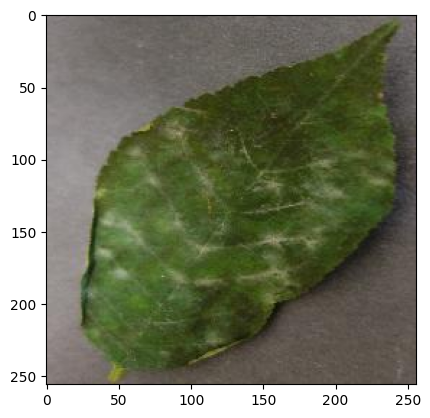

In [66]:
# Take one image to visualize it's changes after every layer
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('C:\\Users\\THARUN\\Downloads\\plantdisease\\train\\cherry (including sour)\\powdery mildew\\0a5aacba-0363-4b71-9beb-30183982d415___FREC_Pwd.M 4919.JPG')
plt.imshow(img1);

#preprocess image
img1 = image.load_img('C:\\Users\\THARUN\\Downloads\\plantdisease\\train\\cherry (including sour)\\powdery mildew\\0a5aacba-0363-4b71-9beb-30183982d415___FREC_Pwd.M 4919.JPG', target_size=(224, 224))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [67]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

# Freeze the convolutional base
base_model.trainable = False

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Define your custom classifier
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Combine the base model with the custom classifier
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Load and preprocess your image
img_path = 'C:\\Users\\THARUN\\Downloads\\plantdisease\\train\\cherry (including sour)\\powdery mildew\\0a5aacba-0363-4b71-9beb-30183982d415___FREC_Pwd.M 4919.JPG'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Extract features from different layers
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_array)

# Print the activations of each layer
for i, layer_activation in enumerate(activations):
    print(f"Layer {i} activation:")
    print(layer_activation[:5, :5])  # Print the first few values of the activation tensor
    print("-" * 100)  # Print a separator


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
Layer 0 activation:
[[[[ 26.060997    13.221001    12.32      ]
   [ 31.060997    18.221       17.32      ]
   [ 32.060997    19.221       18.32      ]
   ...
   [  4.060997    -5.7789993   -4.6800003 ]
   [  8.060997    -1.7789993   -0.6800003 ]
   [ 14.060997     7.2210007    7.3199997 ]]

  [[ 27.060997    14.221001    13.32      ]
   [ 31.060997    18.221       17.32      ]
   [ 30.060997    17.221       16.32      ]
   ...
   [  0.06099701 -10.778999    -9.68      ]
   [ -0.939003   -10.778999    -9.68      ]
   [  2.060997    -4.7789993   -4.6800003 ]]

  [[ 27.060997    14.221001    13.32      ]
   [ 29.060997    16.221       15.32      ]
   [ 27.060997    14.221001    13.32      ]
   ...
   [  8.060997    -2.7789993   -1.6800003 ]
   [  8.060997    -1.7789993   -0.6800003 ]
   [ 10.060997     0.22100067   1.3199997 ]]

  [[ 25.060997    12.221001    11.32      ]
   [ 25.060997    12.221001    11.32      ]
   [ 24.060997    11.221001    10.

# 4.Visualizing The Image After Every Layer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


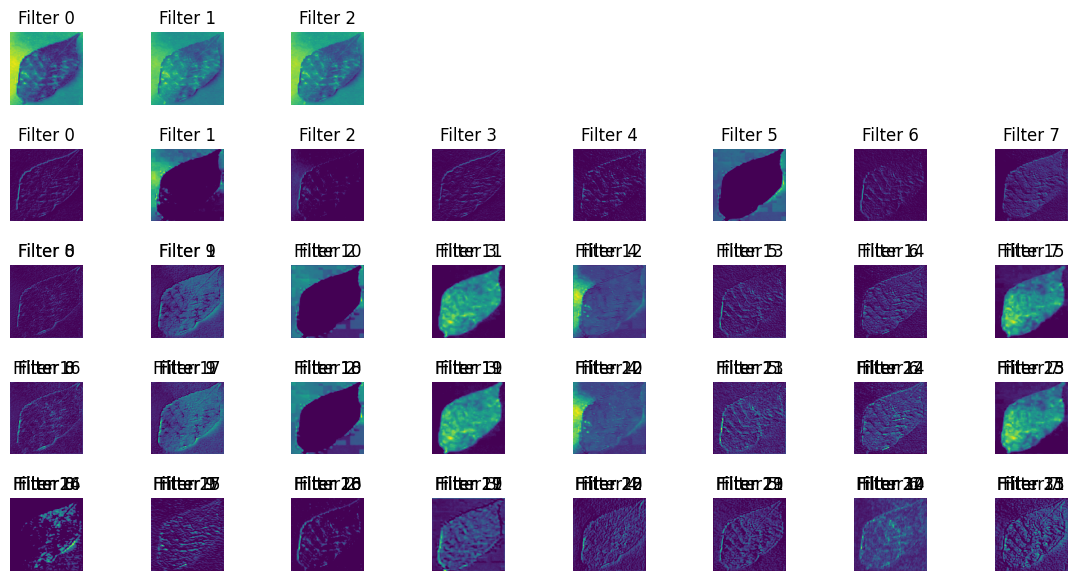

In [68]:
import matplotlib.pyplot as plt

layer_names = ['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'conv2d_4', 'max_pooling2d_4', 'flatten', 'dense_1', 'dropout_1', 'dense_2']

# Assuming 'activation_model' is your model for extracting layer activations
layer_names = [layer.name for layer in activation_model.layers]
activations = activation_model.predict(img_array)

activations_dict = dict(zip(layer_names, activations))

fig = plt.figure(figsize=(14, 7))
columns = 8
rows = 5

# Adjusting the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i, layer_name in enumerate(layer_names):
    if layer_name in activations_dict:
        activations = activations_dict[layer_name]
        if len(activations.shape) > 3:  
            num_filters = activations.shape[3]
            for j in range(num_filters):
                subplot_num = i * columns + j + 1
                if subplot_num <= rows * columns:
                    ax = fig.add_subplot(rows, columns, subplot_num)
                    plt.axis('off')
                    plt.title(f'Filter {j}')
                    plt.imshow(activations[0, :, :, j], cmap='viridis')  # Visualizing in color mode.

plt.show()


# 5. Training the Model

In [69]:
# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=int(train_generator.samples / train_generator.batch_size),
      epochs=5,
      validation_data=validation_generator,
      validation_steps=int(validation_generator.samples / validation_generator.batch_size))

# Save the trained model
model.save('plant_disease_classifier.keras')

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
accuracy_percent = accuracy * 100
loss_percent = loss * 100
print("Validation Loss: %", loss_percent)
print("Validation Accuracy: %", accuracy_percent)

Epoch 1/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 194s 5s/step - accuracy: 0.8209 - loss: 0.3097 - val_accuracy: 1.0000 - val_loss: 9.7932e-04
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 1.0000 - loss: 5.8132e-04 - val_accuracy: 1.0000 - val_loss: 4.8783e-04
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 209s 5s/step - accuracy: 1.0000 - loss: 9.4588e-04 - val_accuracy: 1.0000 - val_loss: 5.2482e-04
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - accuracy: 1.0000 - loss: 3.3586e-04 - val_accuracy: 1.0000 - val_loss: 2.6747e-04
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 221s 5s/step - accuracy: 1.0000 - loss: 4.2855e-04 - val_accuracy: 1.0000 - val_loss: 1.0331e-04
6/6 ━━━━━━━━━━━━━━━━━━━━ 29s 5s/step - accuracy: 1.0000 - loss: 1.0304e-04
Validation Loss: % 0.010224209836451337
Validation Accuracy: % 100.0


### Plot for accuracy and losses

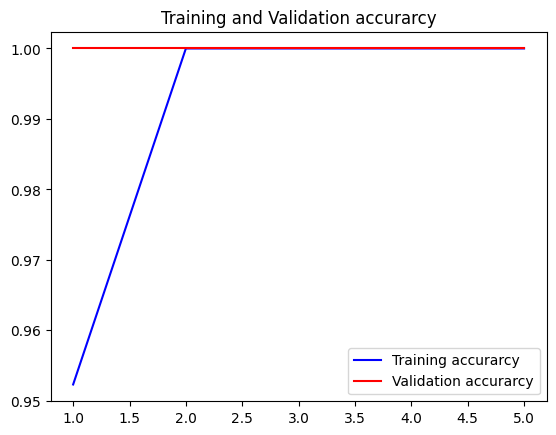

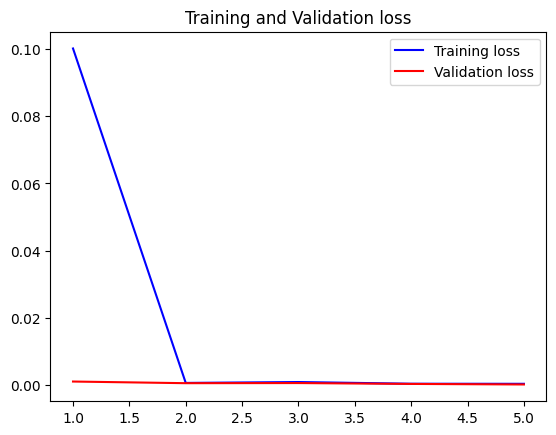

In [70]:
from keras.callbacks import History

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# 6. Defining fuzzy logic rules

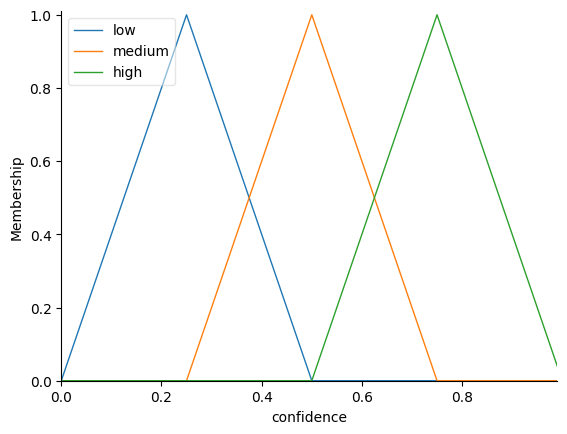

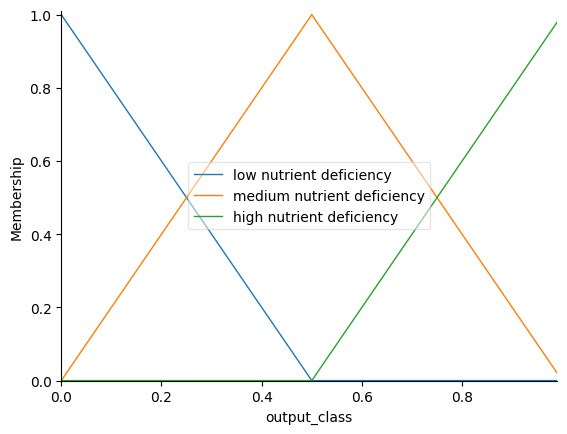

In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Define input variables
confidence = ctrl.Antecedent(np.arange(0, 1, 0.01), 'confidence')
output_class = ctrl.Consequent(np.arange(0, 1, 0.01), 'output_class')

# Define membership functions for confidence variable

confidence['low'] = fuzz.trimf(confidence.universe, [0, 0.25, 0.5])
confidence['medium'] = fuzz.trimf(confidence.universe, [0.25, 0.5, 0.75])
confidence['high'] = fuzz.trimf(confidence.universe, [0.5, 0.75, 1])


# Define membership functions for output_class variable
output_class['low nutrient deficiency'] = fuzz.trimf(output_class.universe, [0, 0, 0.5])
output_class['medium nutrient deficiency'] = fuzz.trimf(output_class.universe, [0, 0.5, 1])  
output_class['high nutrient deficiency'] = fuzz.trimf(output_class.universe, [0.5, 1, 1])

# Define fuzzy rules
rule1 = ctrl.Rule(confidence['low'], output_class['low nutrient deficiency'])
rule2 = ctrl.Rule(confidence['medium'], output_class['medium nutrient deficiency'])
rule3 = ctrl.Rule(confidence['high'], output_class['high nutrient deficiency'])

# Create fuzzy control system
plant_disease_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Create control system simulation
plant_disease = ctrl.ControlSystemSimulation(plant_disease_ctrl)

# Pass input value to the simulation
confidence_value = 0.75  # Adjust confidence value as needed
plant_disease.input['confidence'] = confidence_value

# Compute output
plant_disease.compute()

# Defuzzify output
defuzzified_value = plant_disease.output['output_class']

# Plot membership functions
confidence.view()
output_class.view()
plt.show()


# 7. Implement fuzzy logic integration

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Sample CNN predictions (probabilities)
cnn_predictions = np.array([[0.75, 0.5, 0.25]])  # Example: [0.8 (healthy), 0.2 (diseased)]

# Define fuzzy logic variables
confidence = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'confidence')
output_class = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'output_class')

# Define membership functions for confidence variable

confidence['low'] = fuzz.trimf(confidence.universe, [0, 0.25, 0.5])
confidence['medium'] = fuzz.trimf(confidence.universe, [0.25, 0.5, 0.75])
confidence['high'] = fuzz.trimf(confidence.universe, [0.5, 0.75, 1])


# Define membership functions for output_class variable
output_class['low nutrient deficiency'] = fuzz.trimf(output_class.universe, [0, 0, 0.5])
output_class['medium nutrient deficiency'] = fuzz.trimf(output_class.universe, [0, 0.5, 1])  
output_class['high nutrient deficiency'] = fuzz.trimf(output_class.universe, [0.5, 1, 1])

# Define fuzzy rules
rule1 = ctrl.Rule(confidence['low'], output_class['low nutrient deficiency'])
rule2 = ctrl.Rule(confidence['medium'], output_class['medium nutrient deficiency'])
rule3 = ctrl.Rule(confidence['high'], output_class['high nutrient deficiency'])

# Create fuzzy control system
plant_disease_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Create control system simulation
plant_disease = ctrl.ControlSystemSimulation(plant_disease_ctrl)

# Pass CNN predictions to the simulation
confidence_value = cnn_predictions[0][0]  # Assuming the first prediction represents confidence in the healthy class
print("Confidence Value:", confidence_value)

# Pass CNN prediction to the simulation
plant_disease.input['confidence'] = confidence_value

# Compute output
plant_disease.compute()

# Get the defuzzified value of output_class
defuzzified_value = plant_disease.output['output_class']
print("Defuzzified output class value:", defuzzified_value)

# Print refined prediction
if defuzzified_value < 0.5:
    refined_prediction = "low nutrient deficiency"
elif defuzzified_value >= 0.5 and defuzzified_value <= 0.75:  # Adjusted to include uncertain range
    refined_prediction = "medium nutrient deficiency"
else:
    refined_prediction = "high nutrient deficiency"

print("Refined Prediction:", refined_prediction)


Confidence Value: 0.75
Defuzzified output class value: 0.8333333333333334
Refined Prediction: high nutrient deficiency


# 8. Test and validate the integrated model

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step
CNN Predictions: [[2.783865e-26]]
Defuzzified output class value: 0.16666666666666663
Refined Prediction: low nutrient deficiency


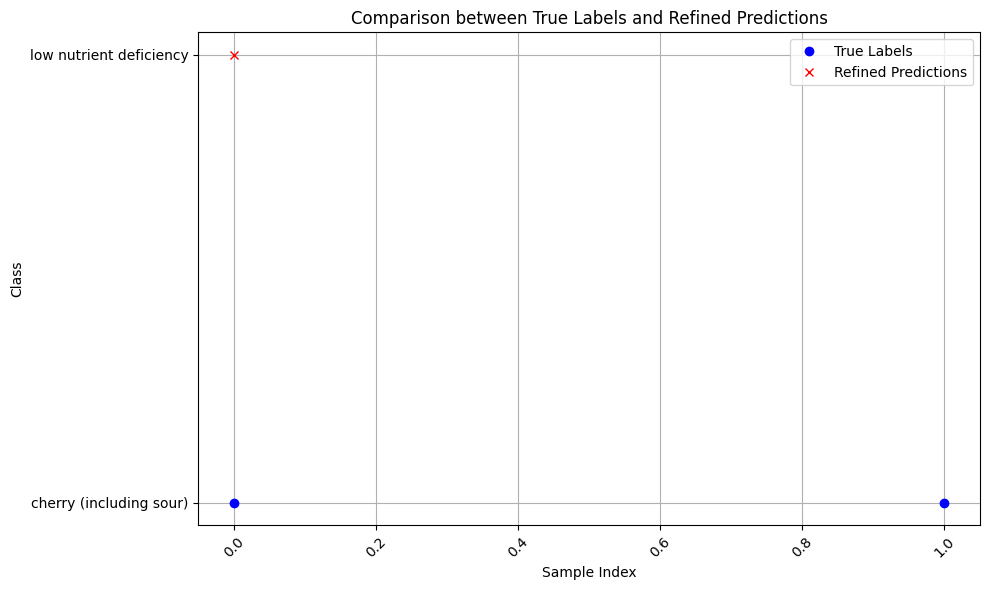

In [73]:
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Assuming the plant_disease_ctrl and plant_disease objects are already defined

# Generate CNN predictions for test samples
cnn_predictions = []  # List to store CNN predictions for each test sample
test_samples = ['C:\\Users\\THARUN\\Downloads\\plantdisease\\train\\cherry (including sour)\\healthy\\fc52c53b-c73d-4b4e-a35c-0cbbc2e644f3___JR_HL 9453.JPG']

for sample_path in test_samples:
    # Load the image
    img_width, img_height = 224, 224 
    img = load_img(sample_path, target_size=(img_width, img_height))
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    # Preprocess the image (e.g., normalize pixel values)
    processed_img_array = preprocess_input(img_array)
    # Add a batch dimension
    processed_img_array = np.expand_dims(processed_img_array, axis=0)
    # Make prediction using the model
    prediction = model.predict(processed_img_array)
    cnn_predictions.append(prediction)
    print("CNN Predictions:", prediction)

# Concatenate predictions along axis 0
cnn_predictions = np.concatenate(cnn_predictions, axis=0)

# Apply fuzzy logic to refine predictions
refined_predictions = []
for cnn_prediction in cnn_predictions:
    # Pass CNN prediction to the simulation
    plant_disease.input['confidence'] = cnn_prediction[0]  # Assuming the first prediction represents confidence in the healthy class
    
    # Compute output
    plant_disease.compute()

    # Get the defuzzified value of output_class
    defuzzified_value = plant_disease.output['output_class']
    print("Defuzzified output class value:", defuzzified_value)

    # Check if defuzzified_value is less than 0.5
   # Print refined prediction
    if defuzzified_value < 0.5:
        refined_prediction = "low nutrient deficiency"
    elif defuzzified_value >= 0.5 and defuzzified_value <= 0.75: 
        refined_prediction = "medium nutrient deficiency"
    else:
        refined_prediction = "high nutrient deficiency"
    print("Refined Prediction:", refined_prediction)
    refined_predictions.append(refined_prediction)

# Evaluate performance
import os

def get_true_labels(dataset_dir):
    true_labels = []
    classes = os.listdir(dataset_dir)
    for class_name in classes:
        class_dir = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_dir):
            images = os.listdir(class_dir)
            true_labels.extend([class_name] * len(images))
    return true_labels

import matplotlib.pyplot as plt

# True labels for the test samples
true_labels = get_true_labels('C:\\Users\\THARUN\\Downloads\\plantdisease\\train')

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(true_labels, label='True Labels', marker='o', linestyle='', color='blue')
plt.plot(refined_predictions, label='Refined Predictions', marker='x', linestyle='', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Comparison between True Labels and Refined Predictions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 9 . Predictions for all images in the dataset.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

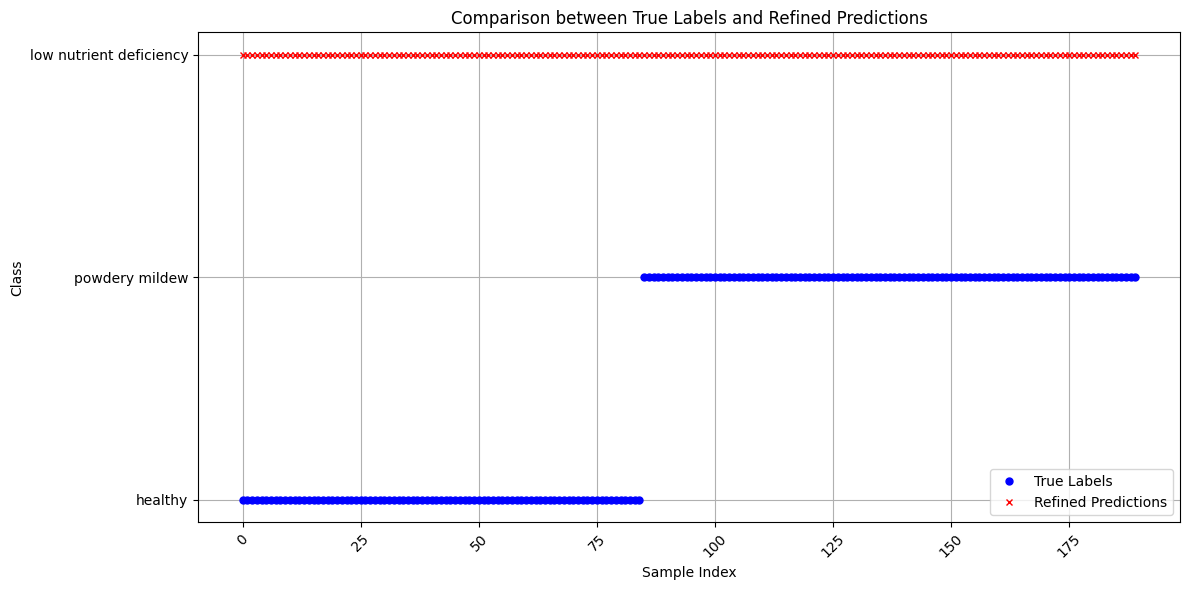

In [74]:
# Define a function to get predictions for all images in the dataset
def get_predictions_for_dataset(dataset_dir):
    predictions = []
    true_labels = []
    
    classes = os.listdir(dataset_dir)
    for class_name in classes:
        class_dir = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_dir):
            images = os.listdir(class_dir)
            for image_name in images:
                image_path = os.path.join(class_dir, image_name)
                # Load the image
                img = load_img(image_path, target_size=(img_width, img_height))
                # Convert the image to a numpy array
                img_array = img_to_array(img)
                # Preprocess the image (e.g., normalize pixel values)
                processed_img_array = preprocess_input(img_array)
                # Add a batch dimension
                processed_img_array = np.expand_dims(processed_img_array, axis=0)
                # Make prediction using the model
                prediction = model.predict(processed_img_array)
                predictions.append(prediction[0])
                true_labels.append(class_name)
    
    return predictions, true_labels

# Get predictions for the entire dataset
test_dataset_dir = 'C:\\Users\\THARUN\\Downloads\\plantdisease\\test\\cherry (including sour)'
all_predictions, all_true_labels = get_predictions_for_dataset(test_dataset_dir)

# Refine predictions using fuzzy logic
refined_predictions = []
defuzzified_values = []
for cnn_prediction in all_predictions:
    plant_disease.input['confidence'] = cnn_prediction[0]  # Assuming the first prediction represents confidence in the healthy class
    plant_disease.compute()
    defuzzified_value = plant_disease.output['output_class']
    
    if defuzzified_value < 0.5:
        refined_prediction = "low nutrient deficiency"
    elif defuzzified_value >= 0.5 and defuzzified_value <= 0.75: 
        refined_prediction = "medium nutrient deficiency"
    else:
        refined_prediction = "high nutrient deficiency"
    
    refined_predictions.append(refined_prediction)
    defuzzified_values.append(defuzzified_value)

    # Print refined prediction and defuzzified value for the current image
    print("Refined Prediction:", refined_prediction, "| Defuzzified output class value:", defuzzified_value)

import matplotlib.pyplot as plt

# Plot the comparison
plt.figure(figsize=(12, 6))
plt.plot(all_true_labels, label='True Labels', marker='o', linestyle='', color='blue', markersize=5)
plt.plot(refined_predictions, label='Refined Predictions', marker='x', linestyle='', color='red', markersize=5)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Comparison between True Labels and Refined Predictions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step


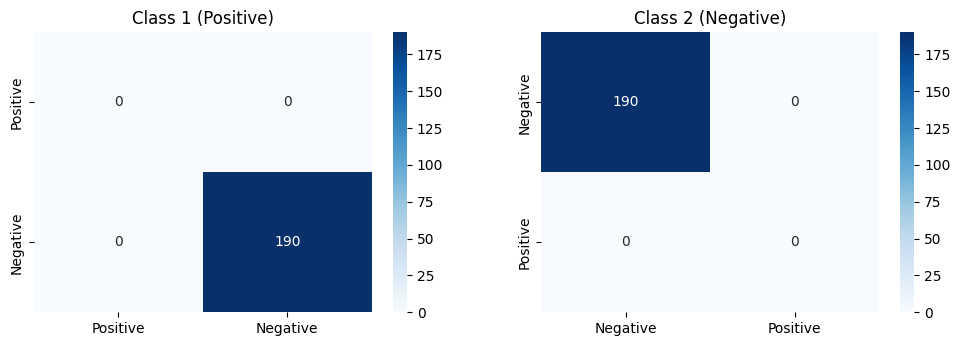

True Positives (TP): 0
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 190


In [75]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions using the CNN model on the validation dataset
predictions = model.predict(validation_generator)

# Convert the predicted labels and true labels into categorical form
predicted_labels = np.argmax(predictions, axis=1)
true_labels = validation_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Ensure the confusion matrix has the correct shape
if cm.shape == (1, 1):
    # If the confusion matrix has only one class, expand it to a 2x2 matrix
    cm = np.array([[cm[0][0], 0], [0, 0]])

# Calculate TP, FP, FN, TN
TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[0][0]

# Plot confusion matrix with partitions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.heatmap(np.array([[TP, FN], [FP, TN]]), annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.title('Class 1 (Positive)')

plt.subplot(2, 2, 2)
sns.heatmap(np.array([[TN, FP], [FN, TP]]), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Class 2 (Negative)')

plt.show()

# Print TP, FP, FN, TN
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Negatives (TN):", TN)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
Image: 00a8e886-d172-4261-85e2-780b3c50ad4d___JR_HL 4156.JPG, Refined Prediction: low nutrient deficiency, Defuzzified Value: [0.16666667]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
Image: 04189592-5db7-441e-a831-eaaa2d7f5d21___JR_HL 9867.JPG, Refined Prediction: low nutrient deficiency, Defuzzified Value: [0.16666667]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
Image: 069996a8-8cdb-4837-a5fe-c5a957b5677a___JR_HL 3938.JPG, Refined Prediction: low nutrient deficiency, Defuzzified Value: [0.16666667]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
Image: 085e9f8b-9574-4b6f-a8e9-309a35c94b25___JR_HL 9755.JPG, Refined Prediction: low nutrient deficiency, Defuzzified Value: [0.16666667]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
Image: 0cc09402-01b5-46a2-a5b1-f9b22f415eaf___JR_HL 9885 copy.JPG, Refined Prediction: low nutrient deficiency, Defuzzified Value: [0.16666667]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
Image: 0de1122b-b2f0-4ae4-bd30-1893331a9ea1___JR_HL 9681.JPG, Refi

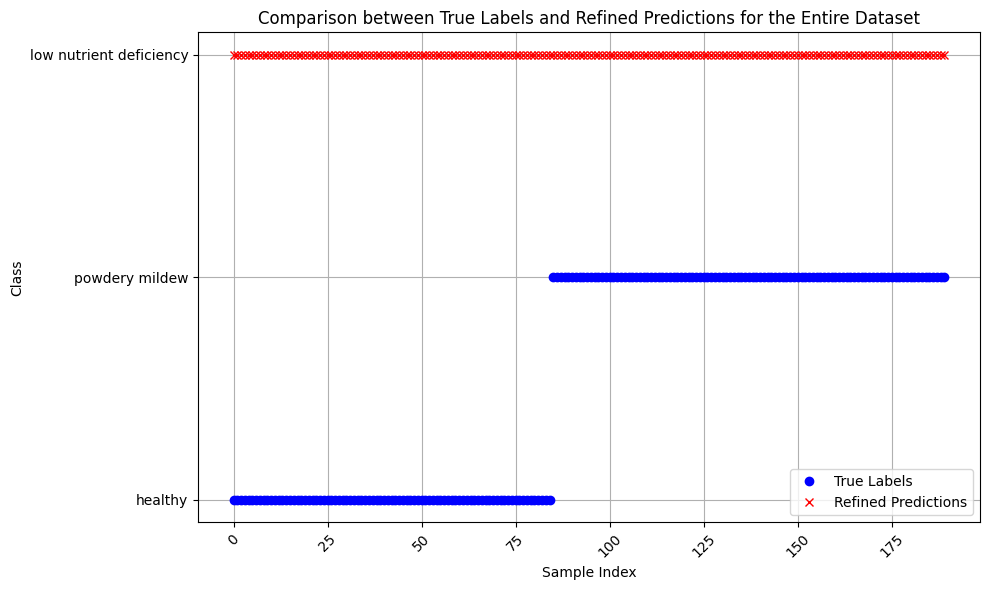

In [76]:
# Load necessary libraries
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# List to store refined predictions and defuzzified values for each image
refined_predictions_all = []
defuzzified_values_all = []

# List to store true labels for the dataset
true_labels_all = []

# Path to the dataset
dataset_dir = 'C:\\Users\\THARUN\\Downloads\\plantdisease\\test\\cherry (including sour)'

# Iterate through each class folder in the dataset
class_folders = os.listdir(dataset_dir)
for class_folder in class_folders:
    class_folder_path = os.path.join(dataset_dir, class_folder)
    if os.path.isdir(class_folder_path):
        # Iterate through each image in the class folder
        images = os.listdir(class_folder_path)
        for image_name in images:
            image_path = os.path.join(class_folder_path, image_name)
            
            # Load the image
            img = load_img(image_path, target_size=(224, 224))
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            
            # Predict using the CNN model
            cnn_prediction = model.predict(img_array)
            
            # Apply fuzzy logic to refine the prediction
            plant_disease.input['confidence'] = cnn_prediction[0]
            plant_disease.compute()
            defuzzified_value = plant_disease.output['output_class']
            if defuzzified_value < 0.5:
                refined_prediction = "low nutrient deficiency"
            elif defuzzified_value >= 0.5 and defuzzified_value <= 0.75: 
                refined_prediction = "medium nutrient deficiency"
            else:
                refined_prediction = "high nutrient deficiency"
            
            # Store refined prediction and defuzzified value
            refined_predictions_all.append(refined_prediction)
            defuzzified_values_all.append(defuzzified_value)
            
            # Store true label for the image
            true_labels_all.append(class_folder)

            print(f"Image: {image_name}, Refined Prediction: {refined_prediction}, Defuzzified Value: {defuzzified_value}")
            
# Plot the comparison between true labels and refined predictions for the entire dataset
plt.figure(figsize=(10, 6))
plt.plot(true_labels_all, label='True Labels', marker='o', linestyle='', color='blue')
plt.plot(refined_predictions_all, label='Refined Predictions', marker='x', linestyle='', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Comparison between True Labels and Refined Predictions for the Entire Dataset')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step


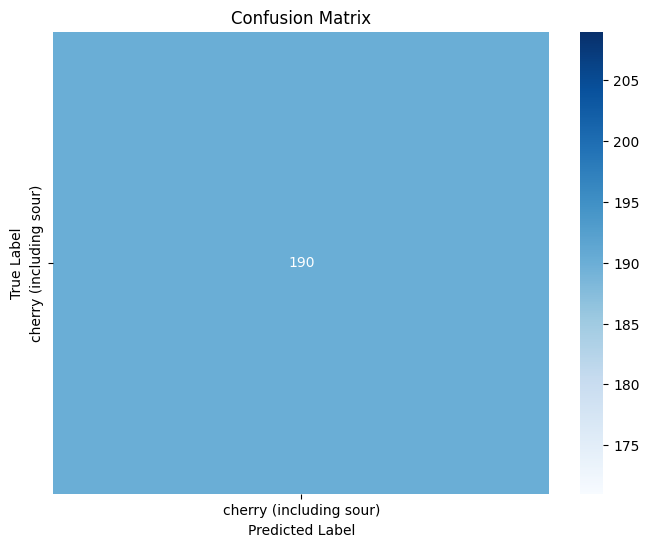

In [77]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions using the CNN model on the test dataset
predictions = model.predict(validation_generator)

# Convert the predicted labels and true labels into categorical form
predicted_labels = np.argmax(predictions, axis=1)
true_labels = validation_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=validation_generator.class_indices.keys(), 
            yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [78]:
from sklearn.metrics import classification_report

# Generate classification report
print(classification_report(true_labels, predicted_labels, target_names=validation_generator.class_indices.keys()))


                         precision    recall  f1-score   support

cherry (including sour)       1.00      1.00      1.00       190

               accuracy                           1.00       190
              macro avg       1.00      1.00      1.00       190
           weighted avg       1.00      1.00      1.00       190

